In [1]:
import pathlib

import geopandas as gpd
import laspy
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import rasterio

In [2]:
data_dir = pathlib.Path("../../data").resolve()

data_paths = {
    "lysva": data_dir / "raw" / "lysva",
    "trees": data_dir / "raw" / "trees",
}

In [3]:
lysva_field_survey = gpd.read_file(data_paths["lysva"] / "field_survey.geojson")
lysva_als_files = sorted((data_paths["lysva"] / "als").glob("*.las"))

In [4]:
#| include: true
#| label: tbl-inventory-example
#| tbl-cap: Abc abcs

display(HTML(lysva_field_survey.sample(5).to_html(index=False)))

plot,tree_no,species,d1,d2,dbh,age,height,angle,comment,geometry
8.0,137.0,Spruce,28.3,27.2,27.75,NaN,NaN,0.0,None,POINT (545757.298 6449076.045)
4.0,258.0,Fir,21.9,21.4,21.65,NaN,NaN,0.0,None,POINT (546020.976 6449600.889)
5.0,61.0,Spruce,32.0,32.2,32.10,NaN,22.1,0.0,None,POINT (545745.328 6449873.608)
9.0,391.0,Birch,24.5,26.1,25.30,NaN,NaN,0.0,None,POINT (546222.833 6449096.661)
5.0,92.0,Alder,26.0,22.0,24.00,81.0,19.1,0.0,None,POINT (545760.122 6449892.698)


In [5]:
xyz = laspy.read(lysva_als_files[0]).xyz

with rasterio.open(data_paths["lysva"] / "ortho" / "plot_01.tif") as dd:
    colors = np.stack([c for c in dd.sample(xyz[:, :2])])

In [6]:
def scatter_point_cloud_3d(xyz: np.ndarray, *, color=None, figsize=None) -> plt.Axes:
    color = color if color is not None else xyz[:, 2]
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(projection="3d")
    ax.scatter(*np.rollaxis(xyz, 1), c=color, s=1)
    ax.set_aspect("equal")
    return ax

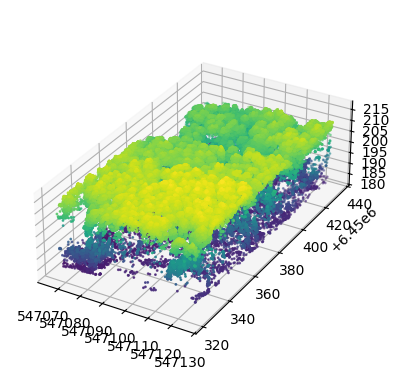

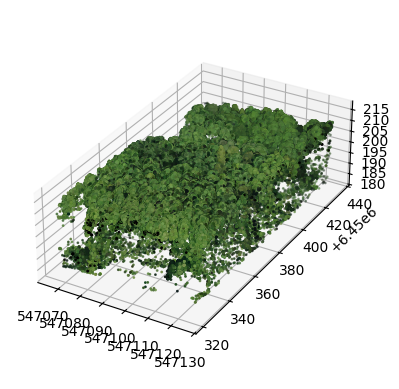

In [7]:
#| include: true
#| label: fig-example-3d-point-cloud
#| layout-ncol: 2
#| fig-cap: This is a caption of this figure.
#| fig-subcap:
#|   - Abc
#|   - Def

scatter_point_cloud_3d(xyz)
scatter_point_cloud_3d(xyz, color=colors / 255);